In [126]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [128]:
df = pd.read_csv('./Dataset/Outlier.csv')
df.sample(5)

,Unnamed: 0,id,age,gender,income,days_on_platform,city,purchases
4459,4459,4459,33.0,Female,11748,17.0,London,3
1066,1066,1066,17.0,Male,83599,23.0,Tokyo,0
2806,2806,2806,15.0,Female,55125,5.0,New York City,0
3115,3115,3115,26.0,Male,35333,52.0,New York City,1
412,412,412,18.0,Female,60688,9.0,New York City,1


In [130]:
df.shape

(5000, 8)

<Axes: xlabel='days_on_platform', ylabel='Count'>

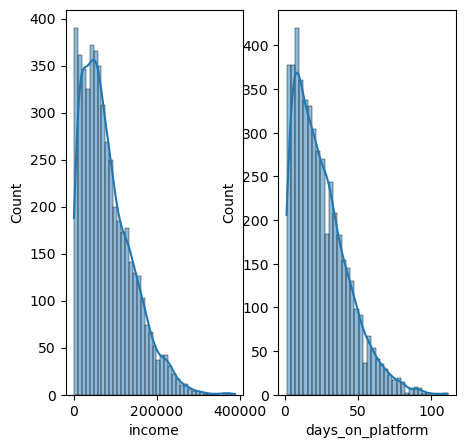

In [131]:
plt.figure(figsize=(16, 5))

plt.subplot(1, 6, 1)
sns.histplot(df['income'], kde=True)

plt.subplot(1, 6, 2)
sns.histplot(df['days_on_platform'], kde=True)

In [133]:
df['income'].skew()

1.0272424013453245

In [134]:
print(df['income'].mean())
print(df['income'].std())
print(df['income'].max())
print(df['income'].min())

79593.3362
60304.0560945204
388572
4


In [135]:
print("Highest given",df['income'].mean() + 3*df['income'].std())
print("Lowest given",df['income'].mean() - 3*df['income'].std())

Highest given 260505.5044835612
Lowest given -101318.83208356118


In [136]:
df[(df['income'] < 260505.5) & (df['income'] > -101318.8)]

,Unnamed: 0,id,age,gender,income,days_on_platform,city,purchases
0,0,0,NaN,Male,126895,14.0,San Francisco,0
1,1,1,NaN,Male,161474,14.0,Tokyo,0
2,2,2,24.0,Male,104723,34.0,London,1
3,3,3,29.0,Male,43791,28.0,London,2
4,4,4,18.0,Female,132181,26.0,London,2
...,...,...,...,...,...,...,...,...
4995,4995,4995,NaN,Female,212261,28.0,San Francisco,1
4996,4996,4996,NaN,Male,70228,12.0,San Francisco,0
4997,4997,4997,NaN,Male,64995,14.0,New York City,0
4998,4998,4998,NaN,Male,56144,4.0,New York City,2


In [137]:
# Trimming

df_changed = df[(df['income'] < 260505.5) & (df['income'] > -101318.8)]
df_changed

,Unnamed: 0,id,age,gender,income,days_on_platform,city,purchases
0,0,0,NaN,Male,126895,14.0,San Francisco,0
1,1,1,NaN,Male,161474,14.0,Tokyo,0
2,2,2,24.0,Male,104723,34.0,London,1
3,3,3,29.0,Male,43791,28.0,London,2
4,4,4,18.0,Female,132181,26.0,London,2
...,...,...,...,...,...,...,...,...
4995,4995,4995,NaN,Female,212261,28.0,San Francisco,1
4996,4996,4996,NaN,Male,70228,12.0,San Francisco,0
4997,4997,4997,NaN,Male,64995,14.0,New York City,0
4998,4998,4998,NaN,Male,56144,4.0,New York City,2


In [138]:
# Calculating the Zscore
df['income_zscore'] = (df['income'] - df['income'].mean())/df['income'].std()

In [156]:
df[(df['income_zscore'] > 3) | (df['income_zscore'] < -3)]

,Unnamed: 0,id,age,gender,income,days_on_platform,city,purchases,income_zscore
96,96,96,NaN,Male,279792,36.0,London,4,3.319821
200,200,200,46.0,Female,309902,51.0,Tokyo,0,3.819124
249,249,249,NaN,Female,265599,58.0,London,1,3.084464
423,423,423,43.0,Female,263840,49.0,London,0,3.055295
455,455,455,13.0,Male,372813,NaN,Miami,4,4.862354
621,621,621,NaN,Male,263497,2.0,San Francisco,3,3.049607
816,816,816,28.0,Male,317779,12.0,Miami,2,3.949745
838,838,838,NaN,Female,324518,35.0,New York City,0,4.061496
944,944,944,34.0,Male,364025,35.0,New York City,0,4.716626
1145,1145,1145,33.0,Male,366344,7.0,San Francisco,1,4.755081


In [158]:
#  Capping


upper_limit = df['income'].mean() + 3*df['income'].std()
lower_limit = df['income'].mean() - 3*df['income'].std()

In [160]:
print(upper_limit)
print(lower_limit)

260505.5044835612
-101318.83208356118


In [162]:

df['income'] = np.where(
    df['income']>upper_limit,
    upper_limit,
    np.where(
        df['income']<lower_limit,
        lower_limit,
        df['income']
    )
)

In [164]:
df['income'].describe()

count      5000.000000
mean      79295.081337
std       59226.941540
min           4.000000
25%       32752.500000
50%       65989.000000
75%      115406.500000
max      260505.504484
Name: income, dtype: float64